In [ ]:
import numpy as np   #импортируем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("salary_data.csv") #читаем данные
display(df.head(5))

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
class LinearRegression(): #класс, реализующий модель линейной регрессии

    def __init__(self, learning_rate = 0.01, iterations = 1000):  #метод, инициализирующий сдвиг (b) и вес (theta), принимающий кол-во итераций и скорость обучения
        self.theta = 0
        self.b = 0
        self.learning_rate = learning_rate
        self.iterations = iterations
                

    def fit(self, X, Y): #метод принимает X и Y и обновляет веса (изначально они равны 0)
        b_current = 0
        m_current = 0
        points = np.column_stack((X, Y))
        
        for i in range(self.iterations):
            self.b, self.theta = self.update_weights(self.b, self.theta, points)
        return self

    
    def update_weights(self, b_current, m_current, points): #метод для обновления весов и сдвига
        b_gradient = 0   
        m_gradient = 0
        n = len(points)
        
        x = points[:, 0]
        y = points[:, 1]
        
        initial_prediction = m_current * x + b_current
        
        b_gradient += (2/n) * np.sum((initial_prediction - y)) #по формуле высчитываем градиентный спуск
        m_gradient += (2/n) * np.sum(x * (initial_prediction - y ))
        
        new_b = b_current - (self.learning_rate * b_gradient)  #обновляем значения градиентного спуска
        new_m = m_current - (self.learning_rate * m_gradient)
        return new_b, new_m

    
    def predict(self, X):   #вовзвращаем значения X_test и Y_pred для линии регрессии на графике
        print("Running...")   
        return self.theta * X + self.b 
        


In [9]:
X = X.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X_train, Y_train) #обучение модели

Y_pred = model.predict(X) #предсказание целевой переменной

print('Theta = ', np.round(model.theta, 2))  #вывод весов и сдвига модели
print('Intercept = ', np.round(model.b, 2))

Running...
Theta =  9398.92
Intercept =  26496.31


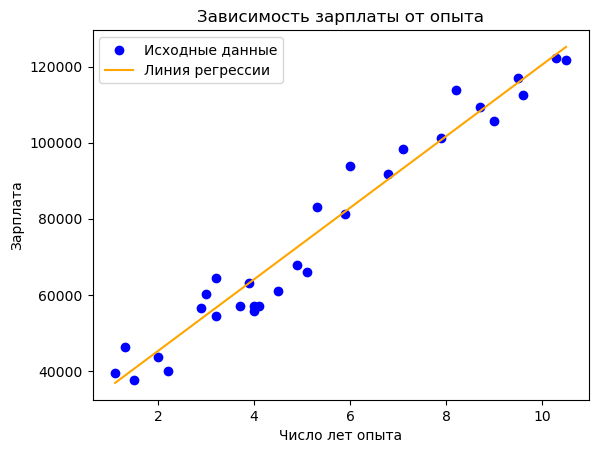

In [11]:
plt.scatter(X, Y, color='blue', label = "Исходные данные") #визуализация модели
plt.plot(X, Y_pred, color='orange', label = "Линия регрессии")
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()
plt.show()


In [13]:
#расчет метрик
mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print(f"MAE = {mae:.4f}\nMSE = {mse:.4f}\nR2 = {r2:.4f}")

MAE = 4674.8083
MSE = 31478640.3630
R2 = 0.9567
